# **Operaciones Básicas con Numpy y Matplotlib**

Cargar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Cargar el archivo CSV

In [8]:
print("Cargando datos desde un archivo CSV...")
df = pd.read_csv('netflix_titles.csv') 

print("Columnas disponibles:")
print(df.columns)

Cargando datos desde un archivo CSV...
Columnas disponibles:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


## Ejemplo de operaciones con NumPy
### a) Conteo de tipos de contenido (type) y análisis con NumPy
Contar el número de 'Movies' y 'TV Shows'

In [5]:
type_counts = df['type'].value_counts()
print("Conteo de tipos de contenido:")
print(type_counts)

Conteo de tipos de contenido:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


Porcentaje de cada tipo utilizando NumPy

In [7]:
total = type_counts.sum()
percentages = np.round((type_counts / total) * 100, 2)
print("Porcentajes de tipos de contenido:")
print(percentages)

Porcentajes de tipos de contenido:
type
Movie      69.62
TV Show    30.38
Name: count, dtype: float64


### b) Análisis de duración para películas

Filtrar películas y convertir 'duration' a numérico

In [13]:
movies = df[df['type'] == 'Movie'].copy()  # Crear una copia explícita
movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)

Estadísticas con NumPy

In [14]:
average_duration = np.mean(movies['duration'])
median_duration = np.median(movies['duration'])
max_duration = np.max(movies['duration'])
min_duration = np.min(movies['duration'])

print("\nDuraciones de películas:")
print(f"Promedio: {average_duration} minutos")
print(f"Mediana: {median_duration} minutos")
print(f"Máximo: {max_duration} minutos")
print(f"Mínimo: {min_duration} minutos")


Duraciones de películas:
Promedio: 99.57718668407311 minutos
Mediana: nan minutos
Máximo: 312.0 minutos
Mínimo: 3.0 minutos


## Ejemplo de visualización con Matplotlib
### a) Gráfico de barras para los tipos de contenido

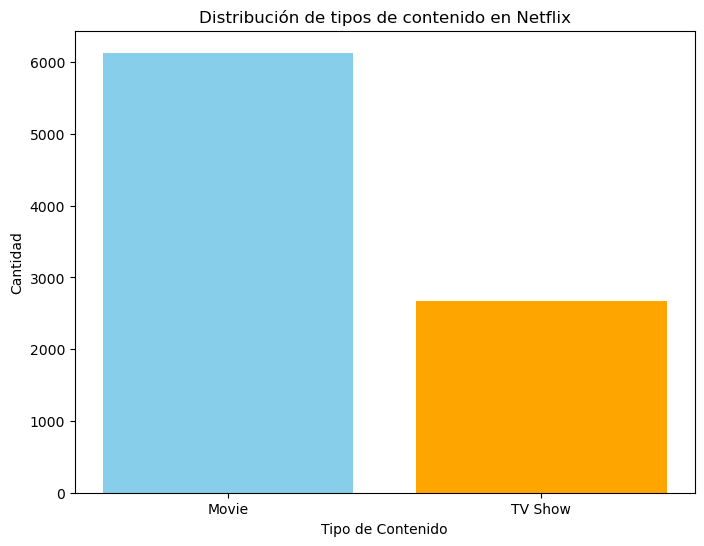

In [10]:
plt.figure(figsize=(8, 6))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title("Distribución de tipos de contenido en Netflix")
plt.xlabel("Tipo de Contenido")
plt.ylabel("Cantidad")
plt.show()

### b) Histograma de duración de películas

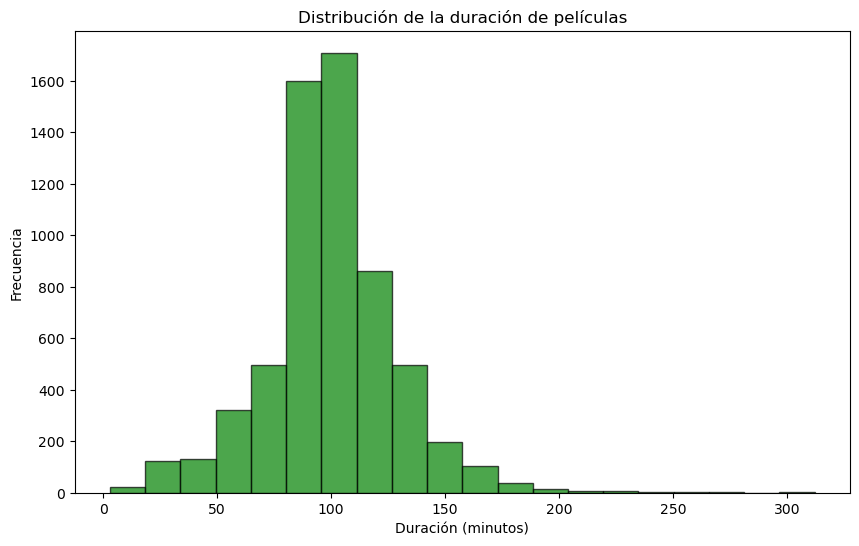

In [15]:
# Crear un histograma de duraciones
plt.figure(figsize=(10, 6))
plt.hist(movies['duration'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title("Distribución de la duración de películas")
plt.xlabel("Duración (minutos)")
plt.ylabel("Frecuencia")
plt.show()

### c) Gráfico circular (pie chart) para países más comunes

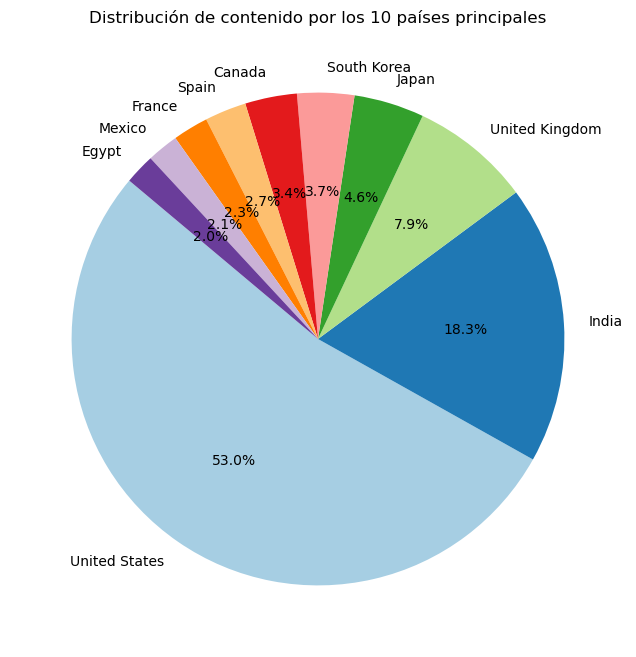

In [16]:
# Países más comunes
country_counts = df['country'].value_counts().head(10)

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribución de contenido por los 10 países principales")
plt.show()

## Combinación de Pandas, NumPy y Matplotlib
### Análisis y visualización de lanzamientos por año

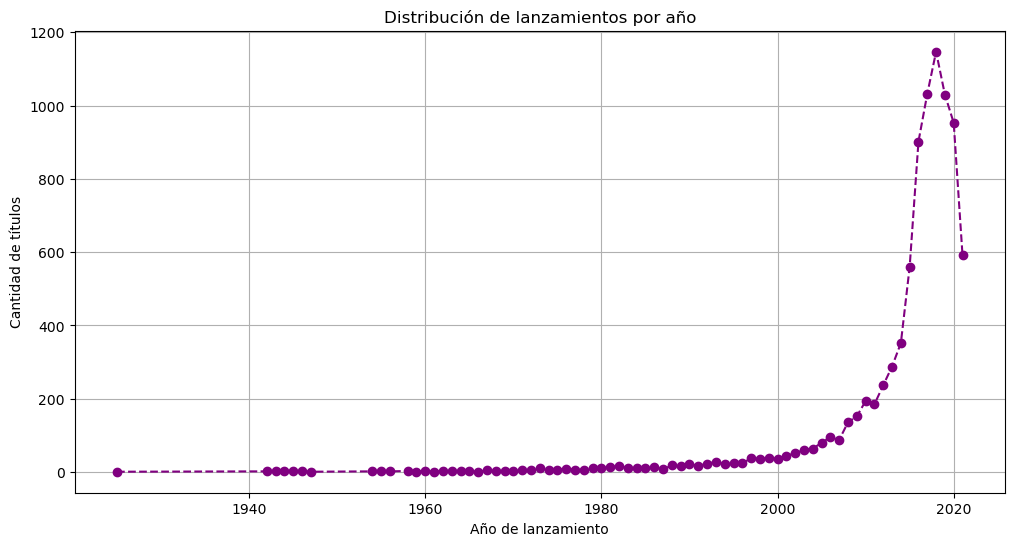

In [18]:
# Convertir 'release_year' a numérico y manejar valores faltantes
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').fillna(np.nan)

# Extraer datos únicos y su frecuencia usando NumPy
years = df['release_year'].dropna().values
unique_years, counts = np.unique(years, return_counts=True)

# Visualización con matplotlib
plt.figure(figsize=(12, 6))
plt.plot(unique_years, counts, marker='o', color='purple', linestyle='--')
plt.title("Distribución de lanzamientos por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de títulos")
plt.grid()
plt.show()